# Basic setup

Ensure you run the notebook using `conda_tensorflow_p27` kernel!

## Download WIDER Face Training and Validation datasets

Download the training set (1.4Gb):

In [1]:
!./gdrive_download.sh 0B6eKvaijfFUDQUUwd21EckhUbWs WIDER-training.zip

WIDER-training.zip      [             <=>    ]   1.36G  60.4MB/s    in 28s     


Download the validation set (346Mb):

In [2]:
!./gdrive_download.sh 0B6eKvaijfFUDd3dIRmpvSk8tLUk WIDER-validation.zip

WIDER-validation.zi     [                <=> ] 345.95M  60.3MB/s    in 5.7s    


Download the testing set (1.7Gb):

In [3]:
!./gdrive_download.sh 0B6eKvaijfFUDbW4tdGpaYjgzZkU WIDER-testing.zip

WIDER-testing.zip       [              <=>   ]   1.72G  11.1MB/s    in 47s     


Ensure we run Python 2:

In [1]:
!python --version

Python 2.7.15


Download faces split:

In [2]:
!wget -q --show-progress http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip

wider_face_split.zi 100%[===================>]   3.42M  2.19MB/s    in 1.6s    


Extract the downloaded data sets according to Tiny Faces <https://github.com/Timforce/tiny-tf> expectations:

In [4]:
!mkdir WIDER
!unzip -q wider_face_split.zip -d WIDER
!for i in `ls WIDER-*`; do unzip -oq "$i" -d WIDER; done

mkdir: cannot create directory ‘WIDER’: File exists


## Bulid two pickle files based on training and validation dataset

In [5]:
!python lib/utils/wider2pkl_detail.py --img_root WIDER/WIDER_train/images --label WIDER/wider_face_split/wider_face_train.mat --out wider_train_roidb_detail.pkl 

Wrote gt roidb to wider_train_roidb_detail.pkl


In [6]:
!python lib/utils/wider2pkl_detail.py --img_root WIDER/WIDER_val/images --label WIDER/wider_face_split/wider_face_val.mat --out wider_val_detail.pkl

Wrote gt roidb to wider_val_detail.pkl


In [7]:
!mkdir data/pickles
!mv wider_*.pkl data/pickles/

## Compile minibatch for data IO

In [8]:
!cd lib/roi_data_layer/; python setup.py build_ext --inplace

running build_ext
cythoning minibatch.pyx to minibatch.c
building 'minibatch' extension
creating build
creating build/temp.linux-x86_64-2.7
gcc -pthread -B /home/ec2-user/anaconda3/envs/tensorflow_p27/compiler_compat -Wl,--sysroot=/ -fno-strict-aliasing -g -O2 -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/numpy/core/include -I/home/ec2-user/anaconda3/envs/tensorflow_p27/include/python2.7 -c minibatch.c -o build/temp.linux-x86_64-2.7/minibatch.o -Wno-cpp -Wno-unused-function
gcc -pthread -shared -B /home/ec2-user/anaconda3/envs/tensorflow_p27/compiler_compat -L/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -Wl,-rpath=/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-2.7/minibatch.o -L/home/ec2-user/anaconda3/envs/tensorflow_p27/lib -lpython2.7 -o /home/ec2-user/SageMaker/tiny-tf/lib/roi_data_layer/minibatch.so


# Demo

Quickly test out the code with pretrained network [tensorflow checkpoint](https://drive.google.com/open?id=1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX):

In [9]:
!./gdrive_download.sh "1sCoVxcCvu-bL0uNJj-3_mRqDNUfWzQKX" Resnet101_tiny.tar.gz

Resnet101_tiny.tar.     [     <=>            ]  99.10M  65.1MB/s    in 1.5s    


In [10]:
!mkdir output; cd output; tar xf ../Resnet101_tiny.tar.gz

Prepare input pictures:

In [11]:
!mkdir -p demo/data
!cp "WIDER/WIDER_train/images/0--Parade/0_Parade_marchingband_1_100.jpg" demo/data

Display the input image:

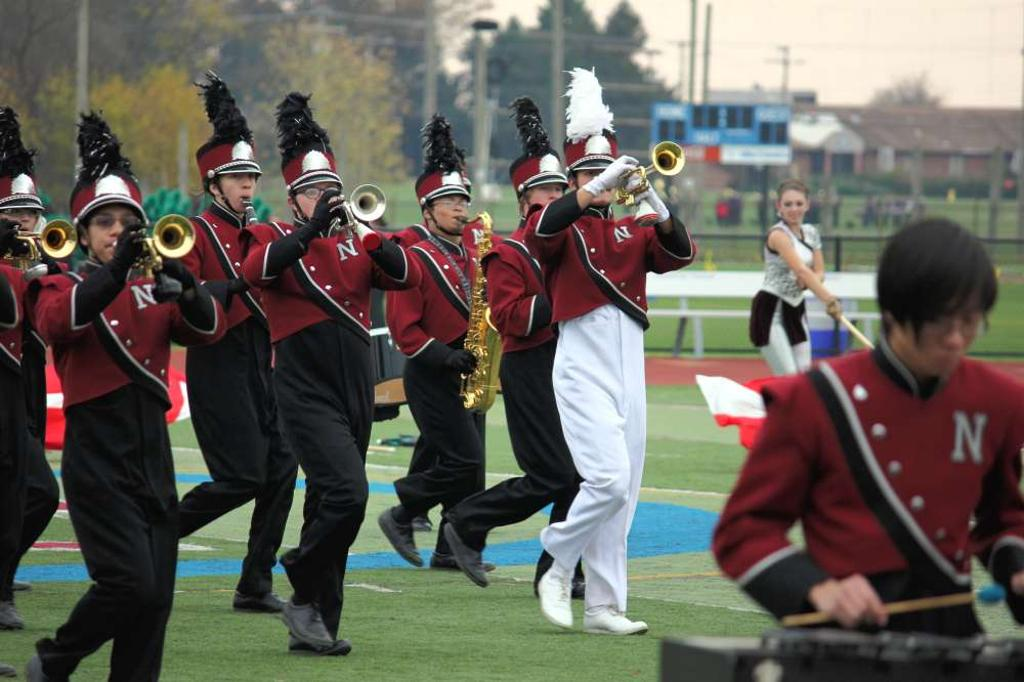

In [12]:
from IPython.display import Image
Image(filename="demo/data/0_Parade_marchingband_1_100.jpg")

Install EasyDict package:

In [8]:
!conda install -y -c auto easydict

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p27

  added / updated specs: 
    - easydict


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h7b6447c_0         3.8 MB
    easydict-1.4               |           py27_0           3 KB  auto
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following NEW packages will be INSTALLED:

    easydict: 1.4-py27_0        auto

The following packages will be UPDATED:

    openssl:  1.1.1d-h7b6447c_4      --> 1.1.1f-h7b6447c_0


openssl-1.1.1f       | 3.8 MB    | #########################

Create the output directory:

In [14]:
!mkdir -p demo/visualize

Execute the inference:

In [15]:
!./demo_tiny_resnet101.sh >log/demo.log 2>&1


Called with args:
Namespace(cfg_file='./cfgs/tiny_resnet101.yml', gpu_id=0, model='./output/Resnet101_tiny/', network_name='Resnet101_test', refBox='./data/RefBox_N25_scaled.mat')
./lib/tiny/config.py:111: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'DEMO': {'CONFIDENCE_Thresh': 0.5,
          'DRAW_SCORE_COLORBAR': True,
          'MAX_INPUT_DIM': 5000,
          'NMS_Thresh': 0.1,
          'PRUNING': True,
          'VISUALIZE': True},
 'RGB_MEANS': array([119.2996 , 110.54627, 101.83843], dtype=float32),
 'RGB_VARIANCE': array([[ 0.7421559 , -1.3868568 ,  0.69416434],
       [ 2.6491976 ,  0.08836862, -2.6558025 ],
       [ 7.305443  ,  7.6848936 ,  7.54298   ]], dtype=float32),
 'TEST': {'CONFIDENCE_Thresh': 0.03,
          'GEN_PR_CURVE_TXT': True,
          'NMS_Thresh': 0.3,
          'PRUNING': True,
          'R

Visualize the inference result:

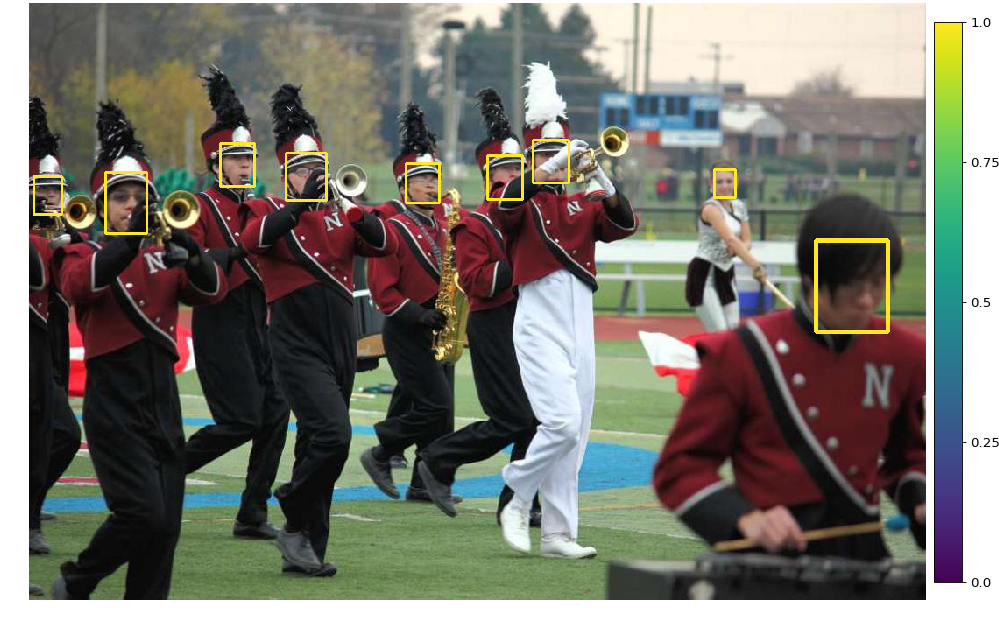

In [16]:
Image(filename="demo/visualize/0_Parade_marchingband_1_100.png")

# Training

Execute the training on a machine with GPU having 7GB+ RAM, e.g. `ml.p3.2xlarge`: the training step will take 0.3s in this case (while on CPU it's 5s).

Therefore expected training time is: 50 epochs x 3220 iterations x 0.3s = 48300s = 13.5h

Expected resource consumption during the training: CPU usage close to 100%, RAM usage 16Gb, GPU usage 0-58%, GPU RAM usage 7Gb.

Create a directory for the pretrained model:

In [18]:
!mkdir -p data/pretrain_model

Download the [Imagenet pretrained model](https://drive.google.com/open?id=1in08YStK2sUEirj8VCtgSB_ADZZJ36-b) (170Mb):

In [19]:
!./gdrive_download.sh "1in08YStK2sUEirj8VCtgSB_ADZZJ36-b" data/pretrain_model/Resnet101.npy

data/pretrain_model     [          <=>       ] 170.37M  69.6MB/s    in 2.4s    


Run the training script:

In [ ]:
!./tiny_resnet101_wider_train.sh >train.log 2>&1

The output will be saved in the directory `output/Resnet101_mm-dd-hh-mm`.

You will be iterested in the model computed in the 50th epoch: `output/Resnet101_mm-dd-hh-mm/VGGnet_tiny__epoch_50-160999*` (in my case `output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50-160999*`).

# Inference

The inference is done with the `demo_net.py` script and we have to find correct sript parameters.
The demo_net.py requires --network=network_name and --weights=model

Examples: 
./demo_tiny_resnet101.sh specifies model='./output/Resnet101_tiny/', network_name='Resnet101_test'

The content of the `model` ./output/Resnet101_tiny/ is:
checkpoint
Resnet101_tiny__epoch_50-80499.data-00000-of-00001
Resnet101_tiny__epoch_50-80499.index
Resnet101_tiny__epoch_50-80499.meta

Search for network Resnet101_test: `find . -name '*Resnet101_test*'`
./lib/networks/Resnet101_test.pyc
./lib/networks/Resnet101_test.py

Speaking of the output generated by my training `ls -1 output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50*`:
output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50-160999.data-00000-of-00001
output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50-160999.index
output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50-160999.meta
there is also:
output/Resnet101_02-26-15-31/checkpoint
So the content must be the --weights=model

What is the --network then? Available networks in the ./lib/networks/:
Resnet101_test
Resnet50_test
VGGnet_test

Difference between AlexNet, VGGNet, ResNet and Inception https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

Let's infer --network from `train.log`:
Namespace(cfg_file='./cfgs/tiny_resnet101.yml', gpu_id=0, log_dir='log', max_epochs=50, network_name='Resnet101_train', output_dir='output', pkl_name='./data/pickles/wider_train_roidb_detail.pkl', pretrained_model='./data/pretrain_model/Resnet101.npy', refBox='./data/RefBox_N25_scaled.mat', restore=0, restore_dir=None)

It has been trained as 'Resnet101_train', but apparently because of the SNAPHOT_PREFIX value in the config below:
`find . -name '*.py' | xargs grep VGG` points to 
`./lib/tiny/config.py:__C.TRAIN.SNAPSHOT_PREFIX = 'VGGnet_tiny'`
my trained model got a prefix VGGnet_tiny, despite it's trained as 'Resnet101_train', therefore I will use `Resnet101_train` for inference.

Copy the newly trained model into a dedicated directory:

In [1]:
!mkdir output/MyTrained
!cp output/Resnet101_02-26-15-31/checkpoint output/MyTrained
!cp output/Resnet101_02-26-15-31/VGGnet_tiny__epoch_50* output/MyTrained

Input images are in `demo/data` and results will be in `demo/visualize/`.
Therefore save the old result first with the prefix 'old_':

In [6]:
!for i in `ls demo/visualize/*`; do cp $i `dirname $i`/old_`basename $i`; done

Run inference with our newly trained model:

In [9]:
!python ./demo_net.py --gpu 0 --weights ./output/MyTrained/ --cfg ./cfgs/tiny_resnet101.yml --refBox ./data/RefBox_N25_scaled.mat --network Resnet101_test


Called with args:
Namespace(cfg_file='./cfgs/tiny_resnet101.yml', gpu_id=0, model='./output/MyTrained/', network_name='Resnet101_test', refBox='./data/RefBox_N25_scaled.mat')
./lib/tiny/config.py:111: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'DEMO': {'CONFIDENCE_Thresh': 0.5,
          'DRAW_SCORE_COLORBAR': True,
          'MAX_INPUT_DIM': 5000,
          'NMS_Thresh': 0.1,
          'PRUNING': True,
          'VISUALIZE': True},
 'RGB_MEANS': array([119.2996 , 110.54627, 101.83843], dtype=float32),
 'RGB_VARIANCE': array([[ 0.7421559 , -1.3868568 ,  0.69416434],
       [ 2.6491976 ,  0.08836862, -2.6558025 ],
       [ 7.305443  ,  7.6848936 ,  7.54298   ]], dtype=float32),
 'TEST': {'CONFIDENCE_Thresh': 0.03,
          'GEN_PR_CURVE_TXT': True,
          'NMS_Thresh': 0.3,
          'PRUNING': True,
          'RATIO_

Visualize the result:

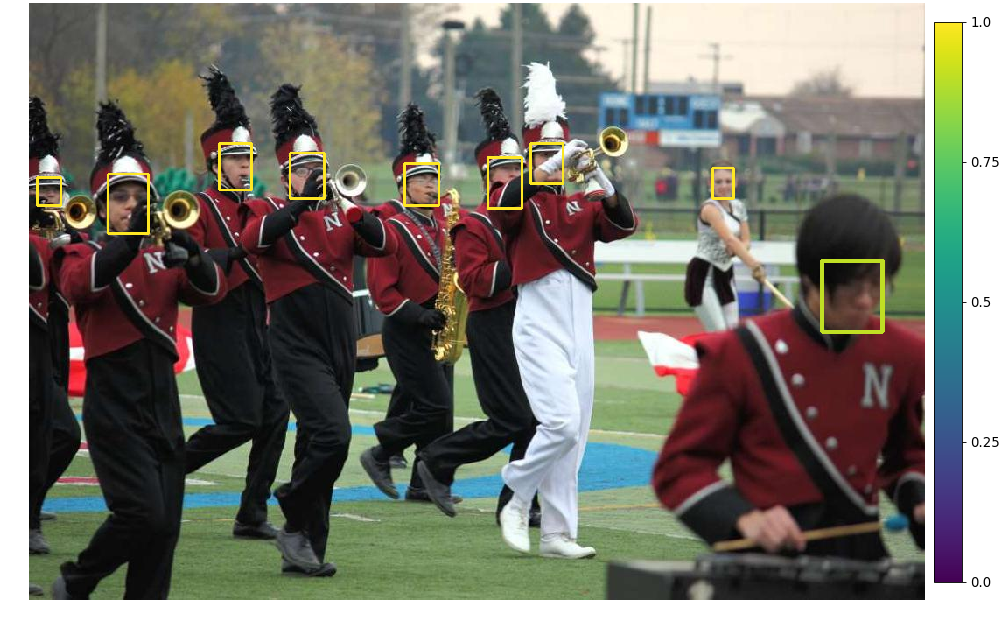

In [11]:
from IPython.display import Image
Image(filename="demo/visualize/0_Parade_marchingband_1_100.png")

Visualize the old result:

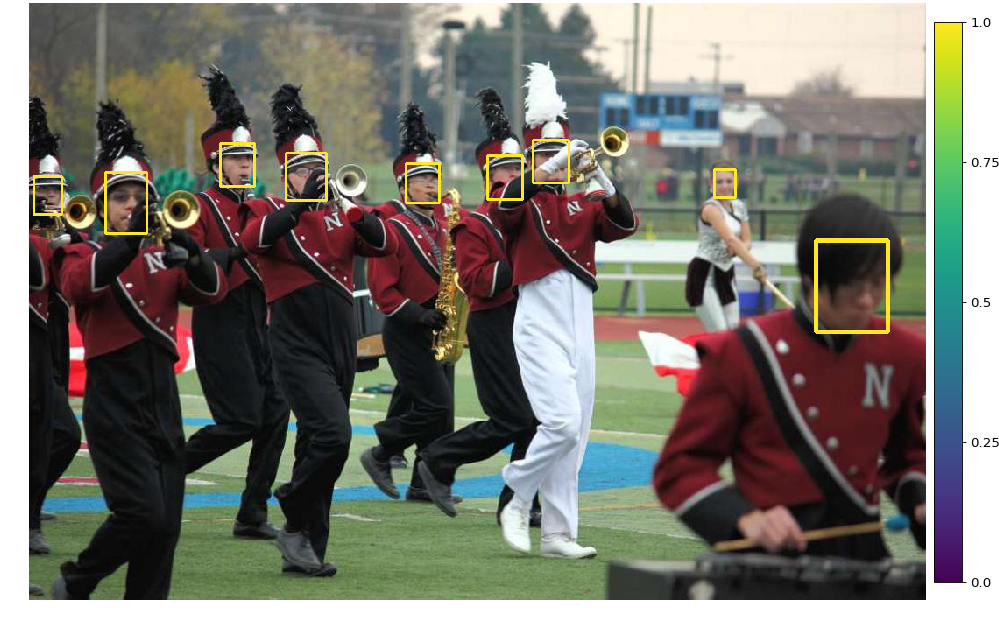

In [12]:
from IPython.display import Image
Image(filename="demo/visualize/old_0_Parade_marchingband_1_100.png")

TODO:
- (DONE) add all the code into Git.
- (DONE) create a script `google-download.sh <file-id>` to simplify the downloading process.
- (DONE) find out how to use GPU in the training, `nvidia-smi` doesn't see any GPU device; - training iteration on GPU is ~0.3s/frame, on CPU ~5s/frame.
- (DONE) find out how to do the inference: look into `demo_net.py`;
- find out why the "warm-up" time of inference and training is so much longer on GPU than on CPU?
- look if Elastic Inference attachment helps with the inference speed!
- investigate how to use the GPU eficiently: why the GPU load fluctuates between 0-58%?
- is it possible to run several Tensorflow jobs sharing the same GPU? Is the GPU RAM a limiting factor: what will happen if I start 3 parallel jobs consuming 7Gb RAM each on a GPU having 16Gb available?
- investigate parallel training (use Horovod?);
- wider2pkl_detail.py can be parallelized